Training new model...
Loading and preprocessing data...
Processed 612650 training samples
Input vocabulary size: 48
Target vocabulary size: 73
Maximum input length: 30
Maximum target length: 26
Building model...
Training model...
Epoch 1/20
9571/9573 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9282 - loss: 0.2484

9573/9573 ━━━━━━━━━━━━━━━━━━━━ 188s 19ms/step - accuracy: 0.9282 - loss: 0.2483 - val_accuracy: 0.9770 - val_loss: 0.0773
Epoch 2/20
9571/9573 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9822 - loss: 0.0524

9573/9573 ━━━━━━━━━━━━━━━━━━━━ 202s 19ms/step - accuracy: 0.9822 - loss: 0.0524 - val_accuracy: 0.9801 - val_loss: 0.0693
Epoch 3/20
9571/9573 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9857 - loss: 0.0418

9573/9573 ━━━━━━━━━━━━━━━━━━━━ 203s 19ms/step - accuracy: 0.9857 - loss: 0.0418 - val_accuracy: 0.9816 - val_loss: 0.0670
Epoch 4/20
9573/9573 ━━━━━━━━━━━━━━━━━━━━ 202s 19ms/step - accuracy: 0.9873 - loss: 0.0368 - val_accuracy: 0.9817 - val_loss: 0.0682
Epoch 5/20
9573/9573 ━━━━━━━━━━━━━━━━━━━━ 187s 19ms/step - accuracy: 0.9882 - loss: 0.0336 - val_accuracy: 0.9812 - val_loss: 0.0696
Epoch 6/20
9573/9573 ━━━━━━━━━━━━━━━━━━━━ 201s 19ms/step - accuracy: 0.9889 - loss: 0.0317 - val_accuracy: 0.9813 - val_loss: 0.0710
Epoch 7/20
9573/9573 ━━━━━━━━━━━━━━━━━━━━ 203s 19ms/step - accuracy: 0.9892 - loss: 0.0304 - val_accuracy: 0.9814 - val_loss: 0.0717
Epoch 8/20
9573/9573 ━━━━━━━━━━━━━━━━━━━━ 200s 19ms/step - accuracy: 0.9895 - loss: 0.0294 - val_accuracy: 0.9815 - val_loss: 0.0735


Saving models and tokenizers...
Evaluating model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/s

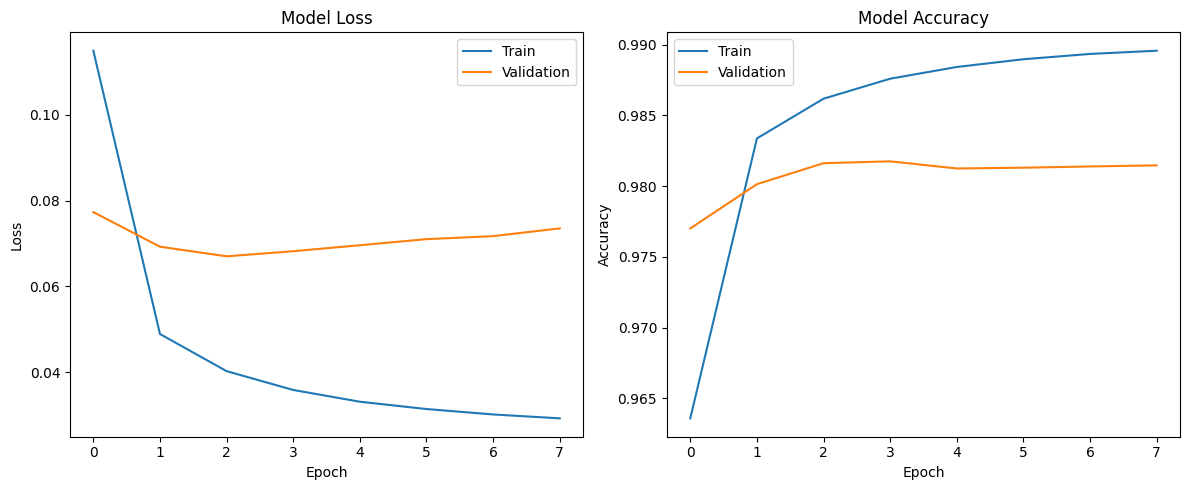

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Bidirectional, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import os
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Create directory for model outputs
MODEL_DIR = 'konkani_model'
os.makedirs(MODEL_DIR, exist_ok=True)

class KonkaniTransliterator:
    def __init__(self):
        # Initialize class variables
        self.model = None
        self.encoder_model = None
        self.decoder_model = None
        self.input_tokenizer = None
        self.target_tokenizer = None
        self.max_input_length = None
        self.max_target_length = None
        self.input_vocab_size = None
        self.target_vocab_size = None

    def preprocess_data(self, train_path, test_path, valid_path):
        """Load and preprocess data from CSV files"""
        print("Loading and preprocessing data...")

        # Load CSV files
        train_data = pd.read_csv(train_path)
        test_data = pd.read_csv(test_path)
        valid_data = pd.read_csv(valid_path)

        # Extract the relevant columns
        train_input = train_data['english word'].astype(str).values
        train_target = train_data['native word'].astype(str).values

        valid_input = valid_data['english word'].astype(str).values
        valid_target = valid_data['native word'].astype(str).values

        test_input = test_data['english word'].astype(str).values
        test_target = test_data['native word'].astype(str).values

        # Create character-level representation by adding spaces between characters
        train_input_char = [' '.join(list(word)) for word in train_input]
        train_target_char = [' '.join(list(word)) for word in train_target]

        valid_input_char = [' '.join(list(word)) for word in valid_input]
        valid_target_char = [' '.join(list(word)) for word in valid_target]

        test_input_char = [' '.join(list(word)) for word in test_input]
        test_target_char = [' '.join(list(word)) for word in test_target]

        # Add start and end tokens to target sequences
        train_target_char = ['<start> ' + word + ' <end>' for word in train_target_char]
        valid_target_char = ['<start> ' + word + ' <end>' for word in valid_target_char]
        test_target_char = ['<start> ' + word + ' <end>' for word in test_target_char]

        print(f"Processed {len(train_input)} training samples")

        # Create tokenizers
        self.input_tokenizer = Tokenizer(filters='', lower=False)
        self.target_tokenizer = Tokenizer(filters='', lower=False)

        # Fit tokenizers on the data
        self.input_tokenizer.fit_on_texts(train_input_char)
        self.target_tokenizer.fit_on_texts(train_target_char)

        # Get vocabulary sizes
        self.input_vocab_size = len(self.input_tokenizer.word_index) + 1
        self.target_vocab_size = len(self.target_tokenizer.word_index) + 1

        print(f"Input vocabulary size: {self.input_vocab_size}")
        print(f"Target vocabulary size: {self.target_vocab_size}")

        # Convert texts to sequences
        train_input_seq = self.input_tokenizer.texts_to_sequences(train_input_char)
        train_target_seq = self.target_tokenizer.texts_to_sequences(train_target_char)

        valid_input_seq = self.input_tokenizer.texts_to_sequences(valid_input_char)
        valid_target_seq = self.target_tokenizer.texts_to_sequences(valid_target_char)

        # Determine maximum sequence lengths
        self.max_input_length = max([len(seq) for seq in train_input_seq])
        self.max_target_length = max([len(seq) for seq in train_target_seq])

        print(f"Maximum input length: {self.max_input_length}")
        print(f"Maximum target length: {self.max_target_length}")

        # Pad sequences
        encoder_input_data = pad_sequences(train_input_seq, maxlen=self.max_input_length, padding='post')
        decoder_input_data = pad_sequences(train_target_seq, maxlen=self.max_target_length, padding='post')

        valid_encoder_input_data = pad_sequences(valid_input_seq, maxlen=self.max_input_length, padding='post')
        valid_decoder_input_data = pad_sequences(valid_target_seq, maxlen=self.max_target_length, padding='post')

        # Create target data for training (shifted by one time step)
        decoder_target_data = np.zeros_like(decoder_input_data)
        decoder_target_data[:, :-1] = decoder_input_data[:, 1:]

        valid_decoder_target_data = np.zeros_like(valid_decoder_input_data)
        valid_decoder_target_data[:, :-1] = valid_decoder_input_data[:, 1:]

        # Store original word data for testing
        self.test_input_original = test_input
        self.test_target_original = test_target
        self.test_input_char = test_input_char
        self.test_target_char = test_target_char

        return (encoder_input_data, decoder_input_data, decoder_target_data,
                valid_encoder_input_data, valid_decoder_input_data, valid_decoder_target_data)

    def build_model(self):
        """Build sequence-to-sequence model with attention"""
        print("Building model...")

        # Encoder
        encoder_inputs = Input(shape=(self.max_input_length,))
        enc_emb = Embedding(self.input_vocab_size, 256)(encoder_inputs)

        # Bidirectional LSTM for encoder
        encoder_lstm = Bidirectional(LSTM(256, return_sequences=True, return_state=True))
        encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder_lstm(enc_emb)

        # Concatenate forward and backward states
        encoder_h = Concatenate()([forward_h, backward_h])
        encoder_c = Concatenate()([forward_c, backward_c])
        encoder_states = [encoder_h, encoder_c]

        # Decoder
        decoder_inputs = Input(shape=(self.max_target_length,))
        dec_emb = Embedding(self.target_vocab_size, 512)(decoder_inputs)
        decoder_lstm = LSTM(512, return_sequences=True, return_state=True)
        decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)

        # Final dense layer
        decoder_dense = Dense(self.target_vocab_size, activation='softmax')
        decoder_outputs = decoder_dense(decoder_outputs)

        # Define the model
        self.model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

        # Compile model
        self.model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

        # Define encoder inference model
        self.encoder_model = Model(encoder_inputs, encoder_states)

        # Define decoder inference model
        decoder_state_input_h = Input(shape=(512,))
        decoder_state_input_c = Input(shape=(512,))
        decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

        decoder_outputs, state_h, state_c = decoder_lstm(
            dec_emb, initial_state=decoder_states_inputs)

        decoder_states = [state_h, state_c]
        decoder_outputs = decoder_dense(decoder_outputs)

        self.decoder_model = Model(
            [decoder_inputs] + decoder_states_inputs,
            [decoder_outputs] + decoder_states)

        return self.model

    def train(self, encoder_input_data, decoder_input_data, decoder_target_data,
             valid_encoder_input_data, valid_decoder_input_data, valid_decoder_target_data,
             batch_size=64, epochs=20):
        """Train the model"""
        print("Training model...")

        # Create callbacks
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=5, restore_best_weights=True)

        checkpoint = tf.keras.callbacks.ModelCheckpoint(
            os.path.join(MODEL_DIR, 'best_model.h5'),
            monitor='val_loss', save_best_only=True)

        # Train the model
        history = self.model.fit(
            [encoder_input_data, decoder_input_data],
            np.expand_dims(decoder_target_data, -1),
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(
                [valid_encoder_input_data, valid_decoder_input_data],
                np.expand_dims(valid_decoder_target_data, -1)
            ),
            callbacks=[early_stopping, checkpoint]
        )

        # Plot training history
        self._plot_history(history)

        return history

    def _plot_history(self, history):
        """Plot training history"""
        plt.figure(figsize=(12, 5))

        # Plot loss
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Train')
        plt.plot(history.history['val_loss'], label='Validation')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        # Plot accuracy
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Train')
        plt.plot(history.history['val_accuracy'], label='Validation')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.savefig(os.path.join(MODEL_DIR, 'training_history.png'))

    def save_models(self):
        """Save models and tokenizers"""
        print("Saving models and tokenizers...")

        # Save full model
        self.model.save(os.path.join(MODEL_DIR, 'full_model.h5'))

        # Save inference models
        self.encoder_model.save(os.path.join(MODEL_DIR, 'encoder_model.h5'))
        self.decoder_model.save(os.path.join(MODEL_DIR, 'decoder_model.h5'))

        # Save tokenizers
        with open(os.path.join(MODEL_DIR, 'input_tokenizer.pickle'), 'wb') as handle:
            pickle.dump(self.input_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

        with open(os.path.join(MODEL_DIR, 'target_tokenizer.pickle'), 'wb') as handle:
            pickle.dump(self.target_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

        # Save sequence lengths and vocabulary sizes
        metadata = {
            'max_input_length': self.max_input_length,
            'max_target_length': self.max_target_length,
            'input_vocab_size': self.input_vocab_size,
            'target_vocab_size': self.target_vocab_size
        }

        with open(os.path.join(MODEL_DIR, 'metadata.pickle'), 'wb') as handle:
            pickle.dump(metadata, handle, protocol=pickle.HIGHEST_PROTOCOL)

    def load_models(self):
        """Load saved models and tokenizers"""
        print("Loading saved models and tokenizers...")

        try:
            # Load tokenizers
            with open(os.path.join(MODEL_DIR, 'input_tokenizer.pickle'), 'rb') as handle:
                self.input_tokenizer = pickle.load(handle)

            with open(os.path.join(MODEL_DIR, 'target_tokenizer.pickle'), 'rb') as handle:
                self.target_tokenizer = pickle.load(handle)

            # Load metadata
            with open(os.path.join(MODEL_DIR, 'metadata.pickle'), 'rb') as handle:
                metadata = pickle.load(handle)

            self.max_input_length = metadata['max_input_length']
            self.max_target_length = metadata['max_target_length']
            self.input_vocab_size = metadata['input_vocab_size']
            self.target_vocab_size = metadata['target_vocab_size']

            # Load inference models
            self.encoder_model = tf.keras.models.load_model(os.path.join(MODEL_DIR, 'encoder_model.h5'))
            self.decoder_model = tf.keras.models.load_model(os.path.join(MODEL_DIR, 'decoder_model.h5'))

            print("Models loaded successfully")
            return True
        except Exception as e:
            print(f"Error loading models: {str(e)}")
            return False

    def transliterate(self, text):
        """Transliterate a single text input"""
        # Convert to character level with spaces
        input_seq = ' '.join(list(text))

        # Tokenize and pad the input
        seq = self.input_tokenizer.texts_to_sequences([input_seq])
        padded_seq = pad_sequences(seq, maxlen=self.max_input_length, padding='post')

        # Get initial states from encoder
        states_value = self.encoder_model.predict(padded_seq)

        # Initialize target sequence with start token
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = self.target_tokenizer.word_index.get('<start>', 1)

        # Initialize result
        result = ""

        # Decoding loop
        stop_condition = False
        while not stop_condition:
            # Predict next character and states
            output_tokens, h, c = self.decoder_model.predict(
                [target_seq] + states_value)

            # Sample a token
            sampled_token_index = np.argmax(output_tokens[0, -1, :])

            # Find the character
            sampled_char = None
            for char, index in self.target_tokenizer.word_index.items():
                if index == sampled_token_index:
                    sampled_char = char
                    break

            # Break if end token or max length
            if sampled_char == '<end>' or len(result.split()) >= self.max_target_length:
                stop_condition = True
            else:
                # Add character to result if not start token
                if sampled_char != '<start>':
                    result += sampled_char

            # Update target sequence for next prediction
            target_seq = np.zeros((1, 1))
            target_seq[0, 0] = sampled_token_index

            # Update states
            states_value = [h, c]

        # Remove spaces (added for character-level tokenization)
        result = result.replace(' ', '')

        return result

    def evaluate(self, num_samples=None):
        """Evaluate model on test data"""
        print("Evaluating model...")

        if not hasattr(self, 'test_input_original'):
            print("Test data not found. Run preprocess_data first.")
            return None

        if num_samples is None:
            num_samples = len(self.test_input_original)
        else:
            num_samples = min(num_samples, len(self.test_input_original))

        correct = 0
        results = []

        for i in range(num_samples):
            original_input = self.test_input_original[i]
            target = self.test_target_original[i]

            # Transliterate
            prediction = self.transliterate(original_input)

            # Check if correct
            if prediction == target:
                correct += 1

            # Store result
            results.append({
                'input': original_input,
                'target': target,
                'prediction': prediction,
                'correct': prediction == target
            })

            # Print progress
            if (i + 1) % 100 == 0:
                print(f"Evaluated {i + 1}/{num_samples} examples")

        # Calculate accuracy
        accuracy = correct / num_samples
        print(f"Model accuracy: {accuracy * 100:.2f}%")

        return results, accuracy

    def interactive_mode(self):
        """Interactive user interface for transliteration"""
        print("\n" + "="*50)
        print("Konkani Roman to Devanagari Transliteration")
        print("="*50)
        print("Type 'quit' to exit")
        print("-"*50)

        while True:
            user_input = input("\nEnter Roman text to transliterate: ")

            if user_input.lower() == 'quit':
                break

            if not user_input.strip():
                print("Please enter some text.")
                continue

            try:
                result = self.transliterate(user_input)
                print(f"Transliterated text: {result}")
            except Exception as e:
                print(f"Error: {str(e)}")
                print("Please try again with different text.")

def main():
    # File paths
    train_path = '/content/kok_train.csv'
    test_path = '/content/kok_test.csv'
    valid_path = '/content/kok_valid.csv'

    # Create transliterator
    transliterator = KonkaniTransliterator()

    # Check if saved model exists
    if os.path.exists(os.path.join(MODEL_DIR, 'encoder_model.h5')):
        print("Found existing model. Attempting to load...")
        if transliterator.load_models():
            # Start interactive mode with loaded model
            transliterator.interactive_mode()
            return

    print("Training new model...")

    # Preprocess data
    data = transliterator.preprocess_data(train_path, test_path, valid_path)

    # Build model
    transliterator.build_model()

    # Train model
    transliterator.train(*data)

    # Save models
    transliterator.save_models()

    # Evaluate on test data
    transliterator.evaluate(num_samples=100)

    # Start interactive mode
    transliterator.interactive_mode()

if __name__ == "__main__":
    main()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train Loss', 'Validation Loss'])

NameError: name 'plt' is not defined